In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score,f1_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [90]:
#import dataset
data = pd.read_csv('matches.csv')
data

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [86]:
data.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [87]:
data.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [88]:
data = data.iloc[:,:-1]
data.dropna(inplace=True)
data["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [89]:
#Here you can see the name Delhi Daredevils and Delhi Capitals; 
#Delhi Daredevils is the old name of the Delhi Capitals. 
#Similarly, Decan Chargers is the old name of Sunrisers Hyderabad.

#for Delhi Capitals
data['team1']=data['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
data['team2']=data['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
data['winner']=data['winner'].str.replace('Delhi Daredevils','Delhi Capitals')
#for sunrisers Hyderabad
data['team1']=data['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
data['team2']=data['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
data['winner']=data['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [50]:
data.shape

(743, 17)

In [51]:
#Finding out the number of toss wins w.r.t each team
data["toss_winner"].value_counts()

Mumbai Indians                 96
Kolkata Knight Riders          91
Chennai Super Kings            89
Kings XI Punjab                80
Delhi Daredevils               79
Royal Challengers Bangalore    78
Rajasthan Royals               77
Sunrisers Hyderabad            45
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                  9
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [52]:
#Extracting the records where a team won batting first
batting_first=data[data["win_by_runs"]!=0]

# Performing EDA(Exploratory Data Analysis)

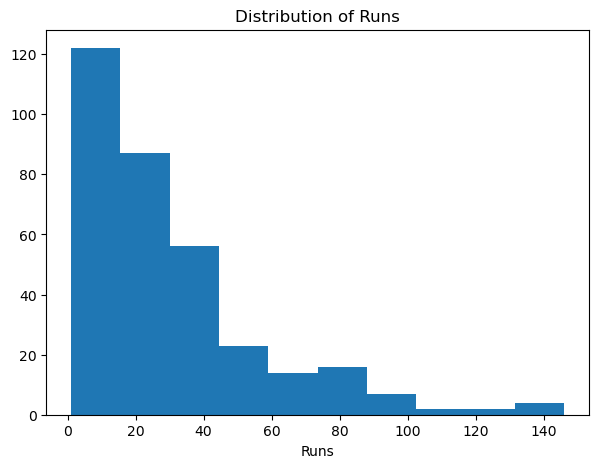

In [92]:
#Making a histogram
plt.figure(figsize=(7,5))
plt.hist(batting_first["win_by_runs"])
plt.title("Distribution of Runs")
plt.xlabel("Runs")
plt.show()

In [54]:
data.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong


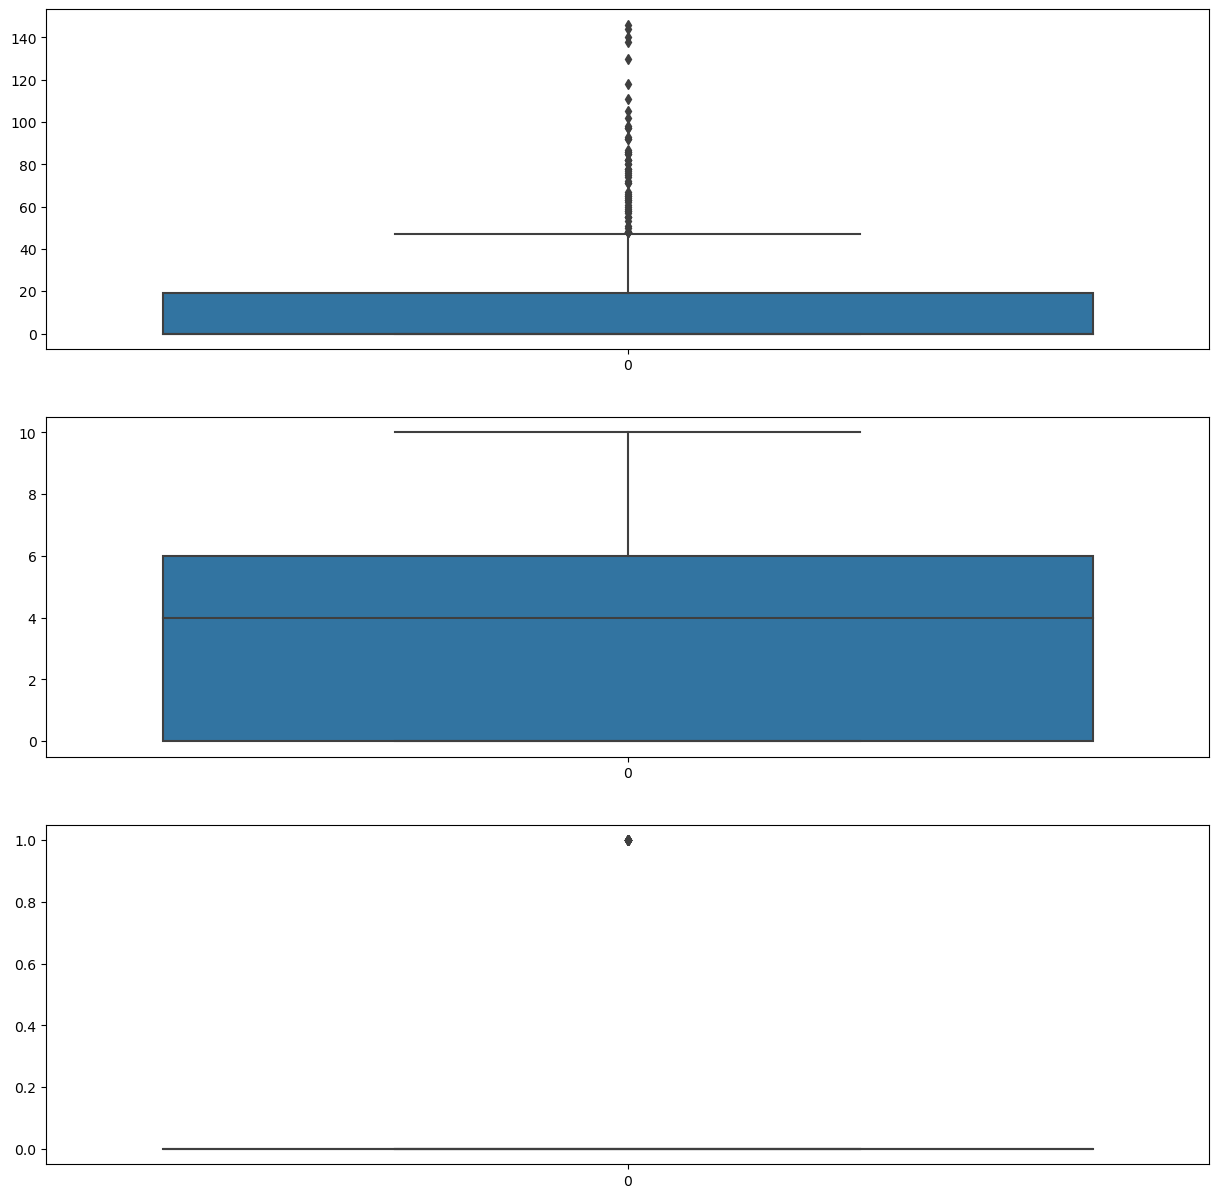

In [55]:
#checking outliers
fig, axs = plt.subplots(3,1, figsize = (15,15))
plt1 = sns.boxplot(data['win_by_runs'], ax=axs[0])
plt2 = sns.boxplot(data['win_by_wickets'], ax=axs[1])
plt3 = sns.boxplot(data['dl_applied'], ax=axs[2])

In [56]:
#Rmeoving outliers
Q1 = data['win_by_runs'].quantile(0.25)
Q3 = data['win_by_runs'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR
data_no_outliers_iqr = data[(data['win_by_runs'] >= lower_bound) & (data['win_by_runs'] <= upper_bound)]

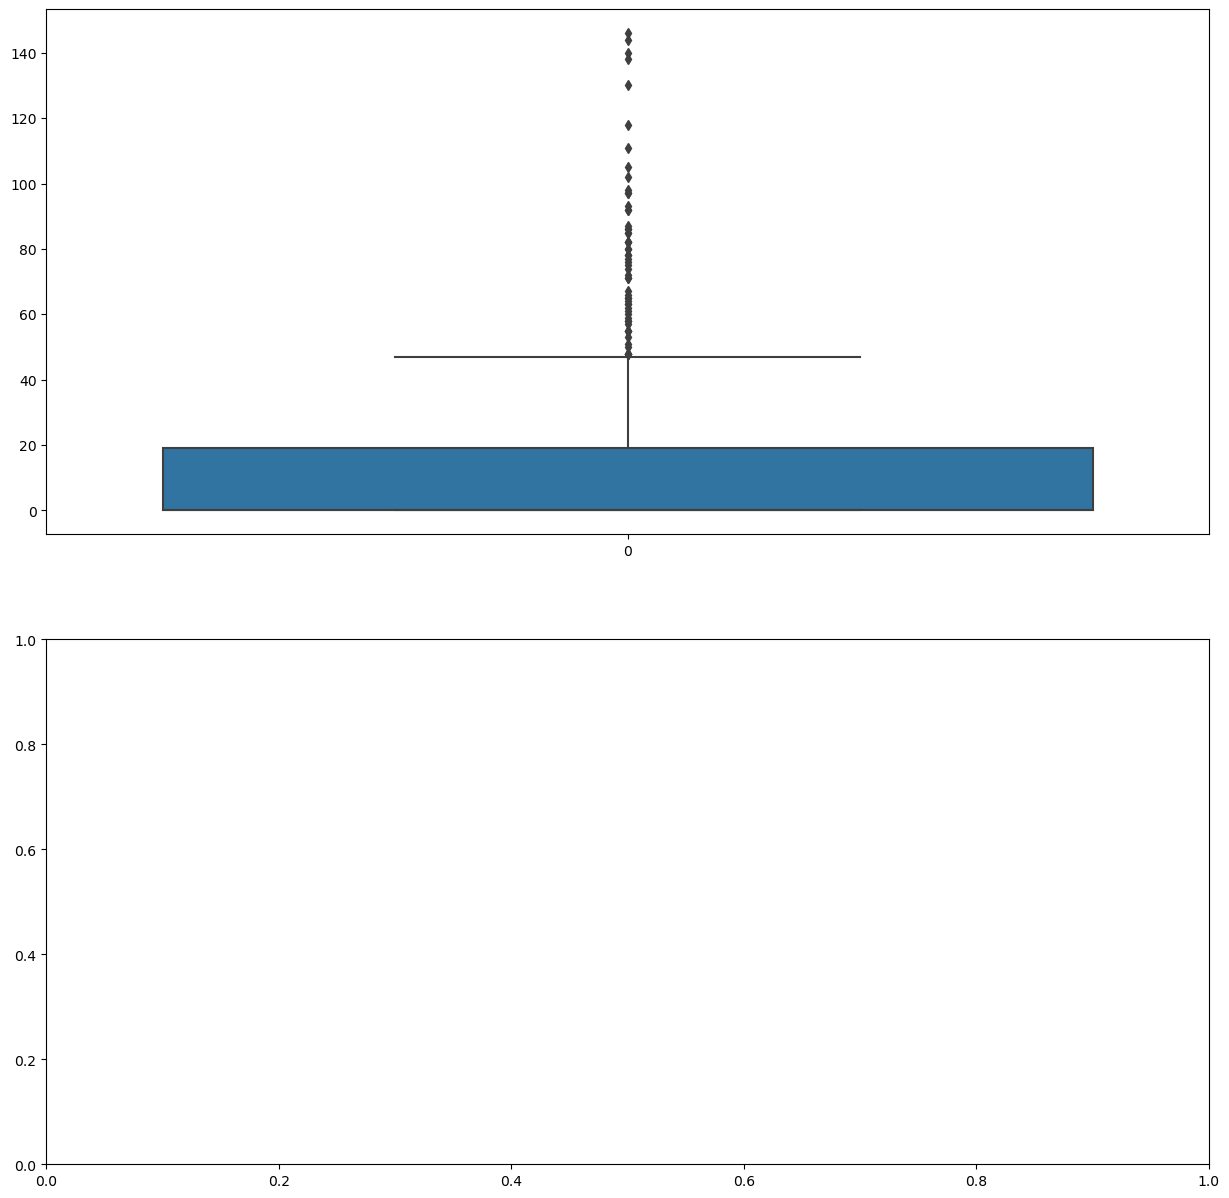

In [57]:
fig, axs = plt.subplots(2,1, figsize = (15,15))
plt1 = sns.boxplot(data['win_by_runs'], ax=axs[0])

<function matplotlib.pyplot.show(close=None, block=None)>

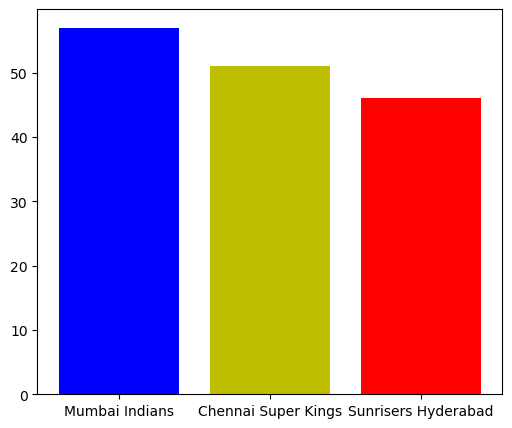

In [58]:
#Making a bar-plot for top 3 teams with most wins after batting first
plt.figure(figsize=(6,5))
plt.bar(list(batting_first['winner'].value_counts()[0:3].keys()),list(batting_first['winner'].value_counts()[0:3]),color=["b","y","r"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

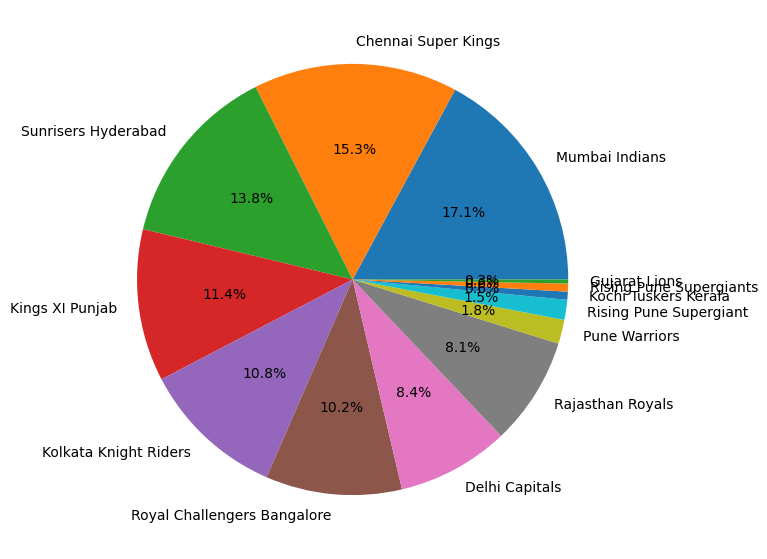

In [59]:
#making a pie chart
plt.figure(figsize=(7,7))
plt.pie(list(batting_first['winner'].value_counts()),labels=list(batting_first['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show

In [60]:
#Extracting those records where a team has won after batting second
batting_second=data[data['win_by_wickets']!=0]

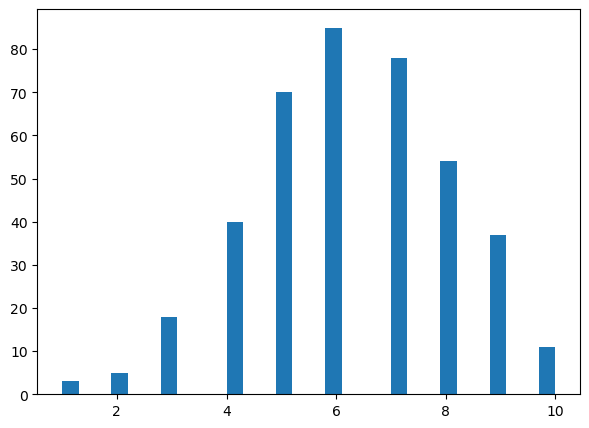

In [61]:
#Making a histogram for frequency of wins w.r.t number of wickets
plt.figure(figsize=(7,5))
plt.hist(batting_second['win_by_wickets'],bins=30)
plt.show()

In [62]:
#Finding out the frequency of number of wins w.r.t each time ofter batting second
batting_second['winner'].value_counts()

Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    47
Chennai Super Kings            47
Delhi Capitals                 46
Rajasthan Royals               46
Kings XI Punjab                41
Sunrisers Hyderabad            38
Gujarat Lions                  12
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

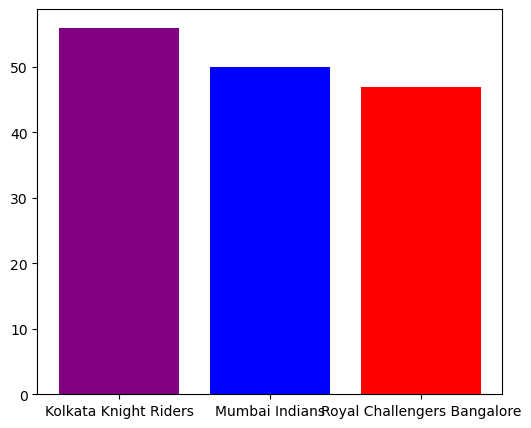

In [63]:
#Making a bar-plot for top 3 teams with most wins after batting Second
plt.figure(figsize=(6,5))
plt.bar(list(batting_second['winner'].value_counts()[0:3].keys()),list(batting_second['winner'].value_counts()[0:3]),color=["purple","blue","r"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

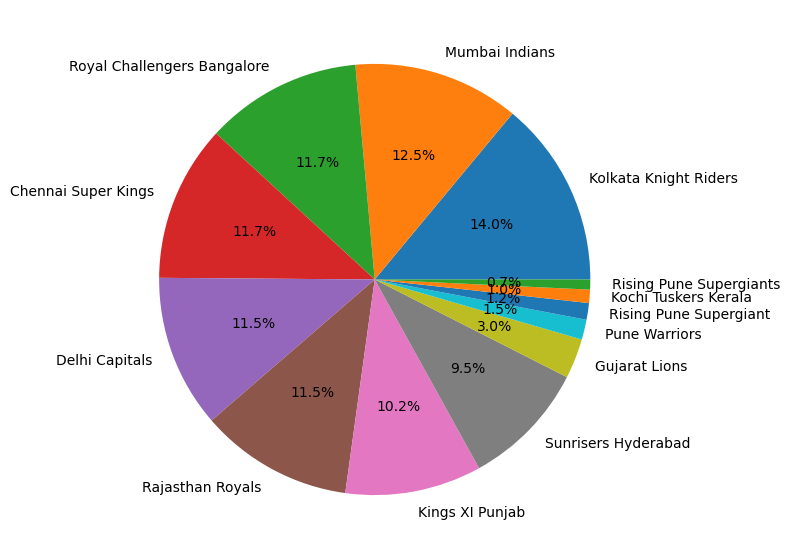

In [64]:
#making a pie chart
plt.figure(figsize=(7,7))
plt.pie(list(batting_second['winner'].value_counts()),labels=list(batting_second['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show

Text(0.5, 1.0, 'Number of  IPL  matches won by each team')

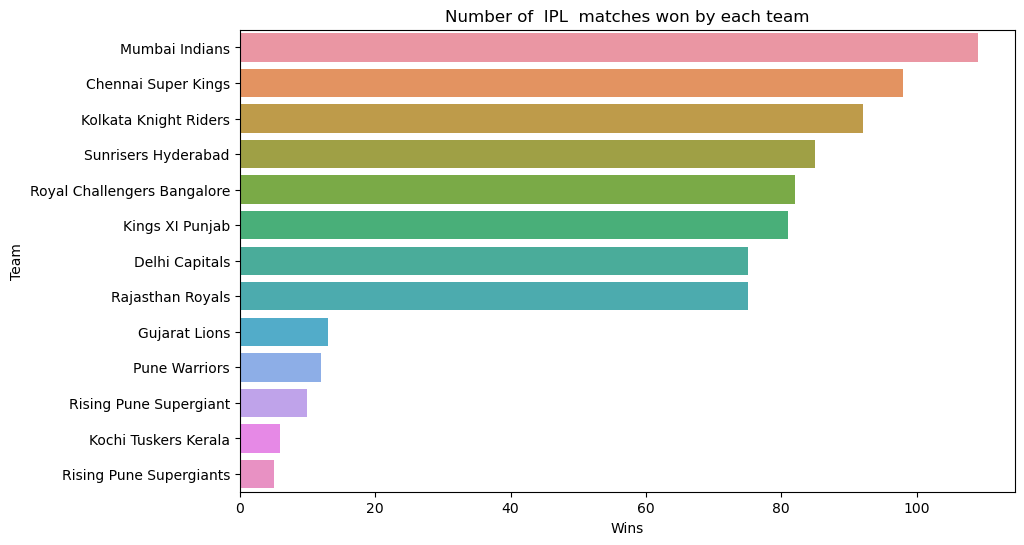

In [65]:
#Number of IPL matches won by each team.
plt.figure(figsize = (10,6))
sns.countplot(y = 'winner',data = data,order= data['winner'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of  IPL  matches won by each team')

Text(0.5, 1.0, 'Total Number of matches played in different stadium')

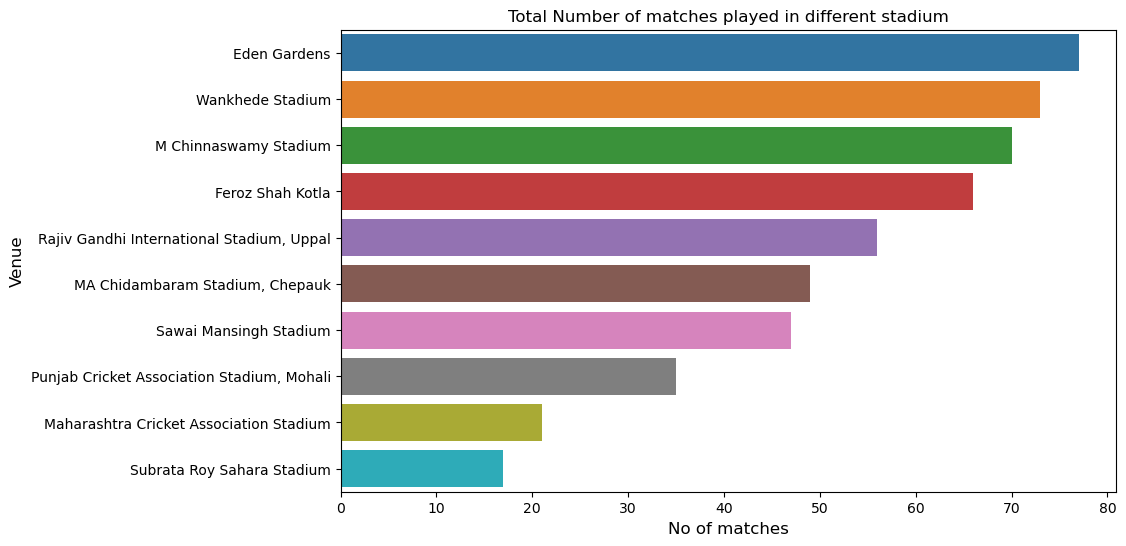

In [66]:
#Total number of matches played in a different stadium
plt.figure(figsize = (10,6))
sns.countplot(y = 'venue',data = data,order = data['venue'].value_counts().iloc[:10].index)
plt.xlabel('No of matches',fontsize=12)
plt.ylabel('Venue',fontsize=12)
plt.title('Total Number of matches played in different stadium')

Text(0.5, 1.0, 'Toss Decision')

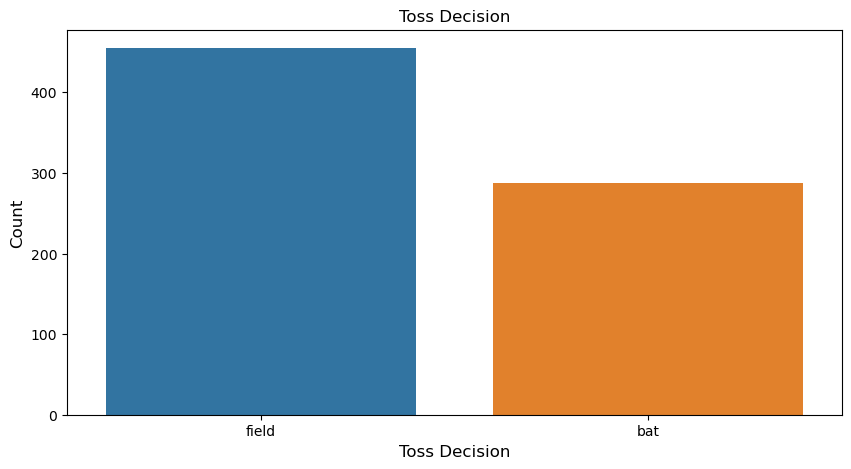

In [67]:
#The decision was taken by the toss winning team.
plt.figure(figsize = (10,5))
sns.countplot(x = "toss_decision", data=data)
plt.xlabel('Toss Decision',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Toss Decision')

In [68]:
#Now let’s check the unique values presented in each feature.
x = ["city", "toss_decision", "result", "dl_applied"]
for i in x:
  print("------------")
  print(data[i].unique())
  print(data[i].value_counts())

------------
['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Mumbai' 'Kolkata' 'Bangalore'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' 'Mohali'
 'Bengaluru']
Mumbai            101
Kolkata            77
Delhi              73
Hyderabad          64
Bangalore          63
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          13
Centurion          12
Ahmedabad          12
Visakhapatnam      12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur      

<Axes: >

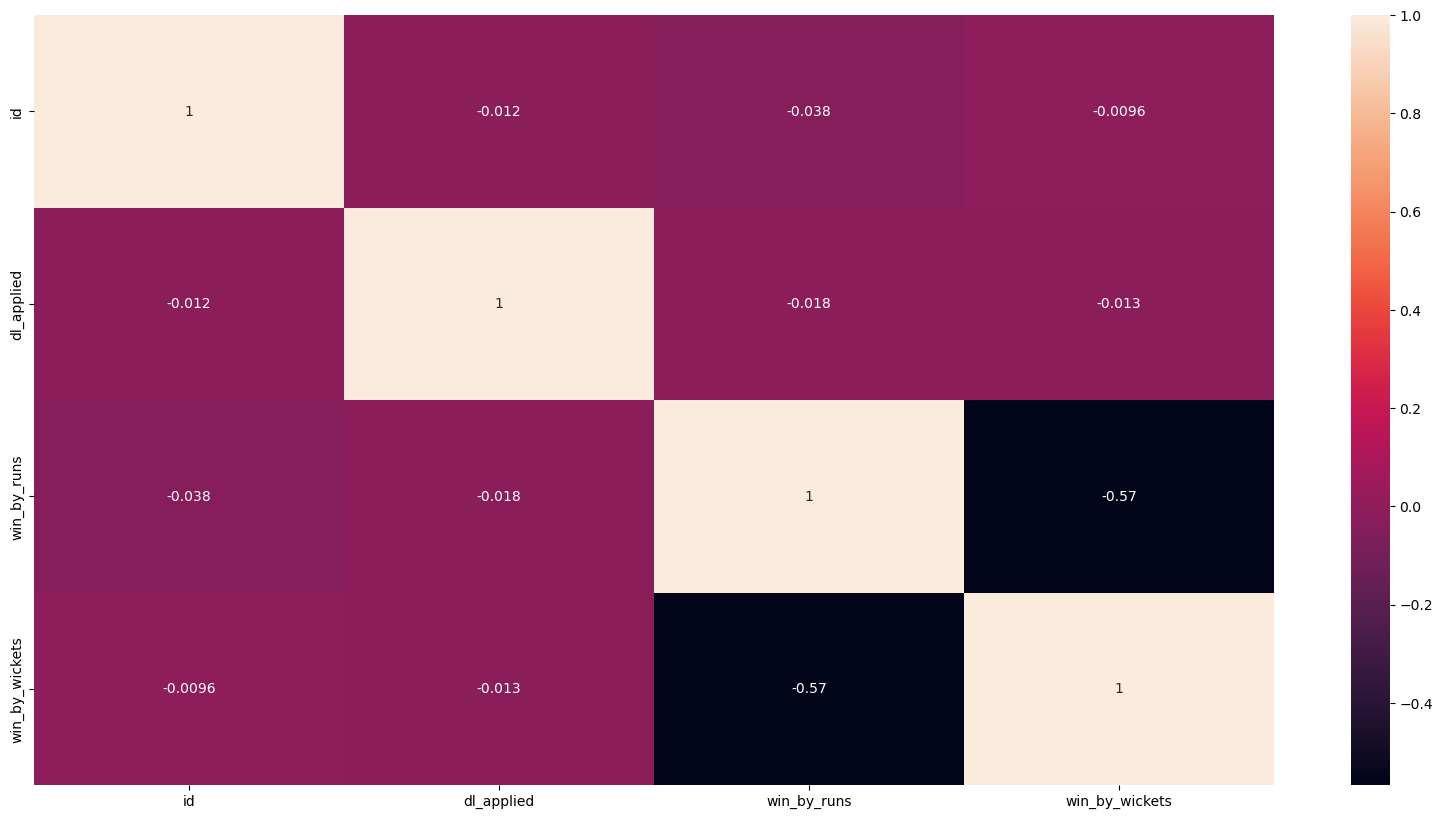

In [69]:
# Let's check the Most Correlated Columns
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

In [70]:
data.shape

(743, 17)

In [71]:
#We don’t need all the features or columns in order to create the model. 
#It will reduce model accuracy, so we are dropping some of the features that don’t affect our result.
data.drop(["id", "Season","city","date", "player_of_match", 'umpire1', "venue", "umpire2"], axis=1, inplace=True)

In [72]:
X = data.drop(["winner"], axis=1)
y = data["winner"]

In [73]:
#Several categorical values are present in the input data, so we are converting them into numerical
#values using the pandas, get_dummies method.
X = pd.get_dummies(X, ["team1","team2", "toss_winner", "toss_decision", "result"], drop_first = True)

In [74]:
#The output data is also a categorical value, so we are converting it into numerical using LabelEncoder of sklearn.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [75]:
# convert our data into a training set and testing set 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

# Model Creation and Evaluation

In [76]:
#we are using  decision tree for this.
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [77]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [78]:
#predicting
y_preddt = dt.predict(x_test)

In [79]:
#evaluating the model
f1=f1_score(y_test, y_preddt,pos_label='positive',average='micro')

f1

0.8859060402684564

In [80]:
#we are using Random Forest for this.
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200,min_samples_split=3,max_features = "auto")

In [81]:
model.fit(x_train, y_train)

RandomForestClassifier(max_features='auto', min_samples_split=3,
                       n_estimators=200)

In [82]:
#predicting
y_pred = model.predict(x_test)

In [83]:
#evaluating the model
print("Accuracy Score", accuracy_score(y_test, y_pred))
print("F1 Score", f1_score(y_test, y_pred,pos_label='positive',average='micro'))

Accuracy Score 0.9395973154362416
F1 Score 0.9395973154362416
